Importing packages

In [122]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats

Importing the datasets as pandas dataframes

In [2]:
purchase_behaviour = pd.read_csv(r"C:\Users\AL57057\Downloads\QVI_purchase_behaviour.csv")

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
trans_data = pd.read_excel(r"C:\Users\AL57057\Downloads\QVI_transaction_data.xlsx")

In [6]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Checking both datasets for duplicates

In [8]:
print("Number of duplicates in purchase behaviour are:", purchase_behaviour.duplicated().sum())
print("Number of duplicates in transaction data are:", trans_data.duplicated().sum())

Number of duplicates in purchase behaviour are: 0
Number of duplicates in transaction data are: 1


Looks like trans_data has a duplicate row. Removing the duplicate row and verifying.

In [9]:
trans_data = trans_data.drop_duplicates()

print("Number of duplicates in transaction data are:", trans_data.duplicated().sum())

Number of duplicates in transaction data are: 0


While looking at the transaction data, we can see that the date column is not in the proper format. We are going to correct that and convert it into the proper format

In [10]:
trans_data["DATE"] = pd.to_datetime(trans_data['DATE'], origin='1899-12-30', unit='D')

trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now, we will look at the product names to get an idea of what products we are looking at.

In [11]:
print(trans_data["PROD_NAME"])

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264835, dtype: object


The product names suggest that we are looking at chips. Let's see what other type of products we have

In [12]:
# Split product names into individual words
product_words = pd.DataFrame(trans_data['PROD_NAME'].str.split(expand=True).stack(), columns=['words'])

# Remove words with digits
product_words = product_words[~product_words['words'].str.contains(r'\d')]

# Remove words with special characters
product_words = product_words[product_words['words'].str.contains(r'^[a-zA-Z]+$')]

# Count the occurrences of each word
word_counts = product_words['words'].value_counts().reset_index()
word_counts.columns = ['words', 'N']

# Sort words by frequency in descending order
word_counts = word_counts.sort_values(by='N', ascending=False)

print(word_counts)

       words      N
0      Chips  49770
1     Kettle  41288
2     Smiths  28859
3       Salt  27976
4     Cheese  27890
..       ...    ...
163  Whlegrn   1432
164       Pc   1431
165      NCC   1419
166   Garden   1419
167    Fries   1418

[168 rows x 2 columns]


There are multiple types if items in the product name list

In [13]:
trans_data.describe(include='all')

C:\Users\AL57057\AppData\Local\Temp\2\ipykernel_37136\288379938.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans_data.describe(include='all')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264835,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835,264835.000000,264835.000000
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.080216,1.355496e+05,1.351584e+05,56.583201,NaN,1.907308,7.304205
std,NaN,76.784306,8.058011e+04,7.813316e+04,32.826692,NaN,0.643655,3.083231
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,70.000000,7.002100e+04,6.760100e+04,28.000000,NaN,2.000000,5.400000


Looks like there is an unusually high value as max for PROD_QTY and TOT_SALES. We should take a closer look at that

In [14]:
trans_data[trans_data["PROD_QTY"]== 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Looks like there are two entries with the value and the sales has happened almost a year apart. This is probably a retailer, let's check if this customer has made any other purchases

In [15]:
trans_data[trans_data["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Looks like the customer is a retailer. We can remove him from the data as he is not part of our analysis.

In [16]:
trans_data = trans_data[trans_data["LYLTY_CARD_NBR"] != 226000]

There were no null values in both datasets. The date format has been corrected, duplicates and outliers have been eliminated. Now we can merge the two datasets into a single one.

In [17]:
final_data = pd.merge(purchase_behaviour,trans_data, on = "LYLTY_CARD_NBR", how = "inner")

final_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264833 non-null  int64         
 1   LIFESTAGE         264833 non-null  object        
 2   PREMIUM_CUSTOMER  264833 non-null  object        
 3   DATE              264833 non-null  datetime64[ns]
 4   STORE_NBR         264833 non-null  int64         
 5   TXN_ID            264833 non-null  int64         
 6   PROD_NBR          264833 non-null  int64         
 7   PROD_NAME         264833 non-null  object        
 8   PROD_QTY          264833 non-null  int64         
 9   TOT_SALES         264833 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [19]:
final_data.describe(include= 'all')

C:\Users\AL57057\AppData\Local\Temp\2\ipykernel_37136\2787839853.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_data.describe(include= 'all')


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,2.648330e+05,264833,264833,264833,264833.000000,2.648330e+05,264833.000000,264833,264833.000000,264833.000000
unique,NaN,7,3,364,NaN,NaN,NaN,114,NaN,NaN
top,NaN,OLDER SINGLES/COUPLES,Mainstream,2018-12-24 00:00:00,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,54478,101988,939,NaN,NaN,NaN,3304,NaN,NaN
first,NaN,NaN,NaN,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.355489e+05,NaN,NaN,NaN,135.079529,1.351577e+05,56.583598,NaN,1.905812,7.299351
std,8.058003e+04,NaN,NaN,NaN,76.784189,7.813305e+04,32.826498,NaN,0.343437,2.527244
min,1.000000e+03,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,7.002100e+04,NaN,NaN,NaN,70.000000,6.760000e+04,28.000000,NaN,2.000000,5.400000


Now we'll convert the two category columns(LifeStage and Premium_Customer) from object to categorical datatype

In [20]:
final_data["LIFESTAGE"] = final_data["LIFESTAGE"].astype('category')
final_data["PREMIUM_CUSTOMER"] = final_data["PREMIUM_CUSTOMER"].astype('category')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264833 non-null  int64         
 1   LIFESTAGE         264833 non-null  category      
 2   PREMIUM_CUSTOMER  264833 non-null  category      
 3   DATE              264833 non-null  datetime64[ns]
 4   STORE_NBR         264833 non-null  int64         
 5   TXN_ID            264833 non-null  int64         
 6   PROD_NBR          264833 non-null  int64         
 7   PROD_NAME         264833 non-null  object        
 8   PROD_QTY          264833 non-null  int64         
 9   TOT_SALES         264833 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.7+ MB


Now let's do a datewise analysis of sales from the final data

In [21]:
final_data.groupby("DATE").size().reset_index(name = "count")

,DATE,count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


There are 364 rows indicating a missing date. Creating a chart with total sales per day visualized

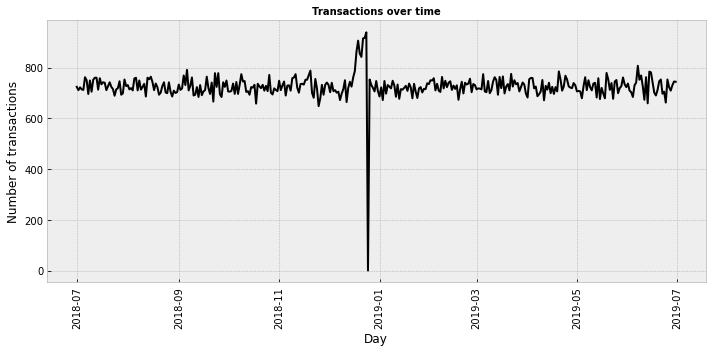

In [22]:
# Create a series of dates
all_dates = pd.date_range(start="2018-07-01", end="2019-06-30", freq='D')
all_dates_df = pd.DataFrame(all_dates, columns=['DATE'])

# Count transactions by date
transactions_by_day = final_data.groupby('DATE').size().reset_index(name='N')

# Merge all dates with transaction counts
merged_df = pd.merge(all_dates_df, transactions_by_day, on='DATE', how='left')

# Fill NaN values with 0
merged_df['N'].fillna(0, inplace=True)

# Setting plot themes to format graphs
plt.style.use('bmh')
plt.rcParams.update({'axes.titlesize': 'medium', 'axes.titleweight': 'bold'})

# Plot transactions over time
plt.figure(figsize=(10, 5))
plt.plot(merged_df['DATE'], merged_df['N'], marker='', color='black', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that there is an increase in sales in December and then a break after. Lets breakdown the sales over December and see.

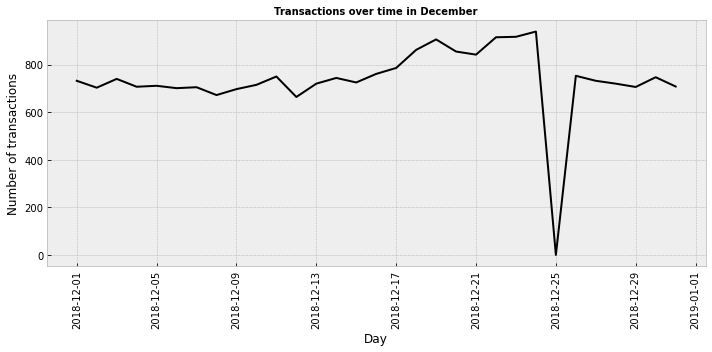

In [23]:
# Filter transactions for the month of December
december_transactions = merged_df[merged_df["DATE"].dt.month == 12]

# Plot transactions over time for December
plt.figure(figsize=(10, 5))
plt.plot(december_transactions['DATE'], december_transactions['N'], marker='', color='black', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time in December')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In the chart we can see the increase in sales is leading up to christmas and on christmas there is no sales as the store is closed. We can move on to deeper analysis and metric devising

In [24]:
# Parse numbers from PROD_NAME and create a new column PACK_SIZE
final_data['PACK_SIZE'] = final_data['PROD_NAME'].str.extract('(\d+)').astype(float)

final_data.head(15)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150.0
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160.0
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165.0
6,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110.0
7,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150.0
8,1009,NEW FAMILIES,Premium,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330.0
9,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170.0


In [25]:
final_data["PACK_SIZE"].describe()

count    264833.000000
mean        182.425540
std          64.325268
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

In [26]:
# Count the number of transactions for each PACK_SIZE and sort the results by PACK_SIZE
pack_size_counts = final_data.groupby('PACK_SIZE').size().reset_index(name='N').sort_values(by='PACK_SIZE')

print(pack_size_counts)

    PACK_SIZE      N
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  43131
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66389
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      300.0  15166
19      330.0  12540
20      380.0   6416


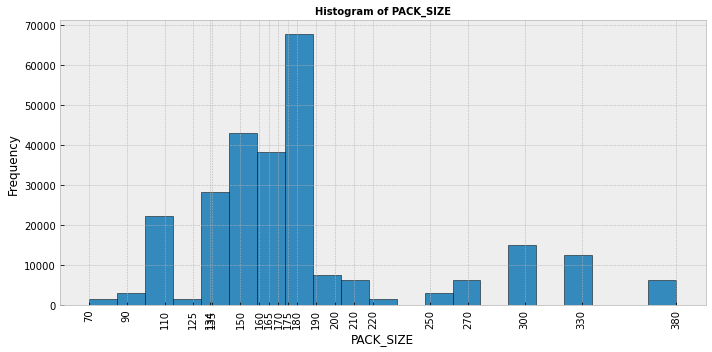

In [27]:
# Plot a histogram of PACK_SIZE as a categorical variable
plt.figure(figsize=(10, 5))
plt.hist(final_data['PACK_SIZE'], bins=len(final_data['PACK_SIZE'].unique()), edgecolor='black')
plt.xlabel('PACK_SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK_SIZE')
plt.xticks(final_data['PACK_SIZE'].unique(), rotation = 90)
plt.grid(True)
plt.tight_layout()
plt.show()

Pack size looks like okay. Let's extract Brand Name next

In [28]:
# Extract the brand name and convert to uppercase

#First, converting the column to string type
final_data["PROD_NAME"] = final_data["PROD_NAME"].astype('str')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264833 non-null  int64         
 1   LIFESTAGE         264833 non-null  category      
 2   PREMIUM_CUSTOMER  264833 non-null  category      
 3   DATE              264833 non-null  datetime64[ns]
 4   STORE_NBR         264833 non-null  int64         
 5   TXN_ID            264833 non-null  int64         
 6   PROD_NBR          264833 non-null  int64         
 7   PROD_NAME         264833 non-null  object        
 8   PROD_QTY          264833 non-null  int64         
 9   TOT_SALES         264833 non-null  float64       
 10  PACK_SIZE         264833 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 20.7+ MB


In [29]:
# extraction and conversion
final_data['BRAND'] = final_data['PROD_NAME'].str.extract(r'(^\w+)')
final_data['BRAND'] = final_data['BRAND'].str.upper()


brand_counts = final_data.groupby("BRAND").size().reset_index(name = "N").sort_values(by = "BRAND")

In [30]:
print(brand_counts)

         BRAND      N
0       BURGER   1564
1          CCS   4551
2      CHEETOS   2927
3     CHEEZELS   4603
4         COBS   9693
5       DORITO   3183
6      DORITOS  24962
7       FRENCH   1418
8        GRAIN   6272
9      GRNWVES   1468
10   INFUZIONS  11057
11      INFZNS   3144
12      KETTLE  41288
13     NATURAL   6050
14         NCC   1419
15         OLD   9324
16    PRINGLES  25102
17         RED   5885
18         RRD  11894
19       SMITH   2963
20      SMITHS  28859
21       SNBTS   1576
22    SUNBITES   1432
23       THINS  14075
24    TOSTITOS   9471
25    TWISTIES   9454
26    TYRRELLS   6442
27  WOOLWORTHS   4437
28          WW  10320


In [31]:
# There are multiple values which mean the same brand, let's correct those

final_data.loc[final_data['BRAND'] == "RED", 'BRAND'] = "RRD"
final_data.loc[final_data['BRAND'] == "NCC", 'BRAND'] = "NATURAL"
final_data.loc[final_data['BRAND'] == "WW", 'BRAND'] = "WOOLWORTHS"
final_data.loc[final_data['BRAND'] == "DORITO", 'BRAND'] = "DORITOS"
final_data.loc[final_data['BRAND'] == "INFZNS", 'BRAND'] = "INFUZIONS"
final_data.loc[final_data['BRAND'] == "SMITH", 'BRAND'] = "SMITHS"
final_data.loc[final_data['BRAND'] == "GRNWVES", 'BRAND'] = "GRAIN"
final_data.loc[final_data['BRAND'] == "SNBTS", 'BRAND'] = "SUNBITES"

In [32]:
final_data.groupby("BRAND").agg(N=("BRAND", "size")).sort_values(by = "N", ascending = False).reset_index()

,BRAND,N
0,KETTLE,41288
1,SMITHS,31822
2,DORITOS,28145
3,PRINGLES,25102
4,RRD,17779
5,WOOLWORTHS,14757
6,INFUZIONS,14201
7,THINS,14075
8,COBS,9693
9,TOSTITOS,9471


In [33]:
#Checking for nulls 
final_data['LIFESTAGE'].isnull().sum()

0

There are no nulls.

Now that Data exploration is complete, we can move on to Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to the client:
Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is
• How many customers are in each segment
• How many chips are bought per customer by segment
• What’s the average chip price by customer segment
We could also ask our data team for more information. Examples are:
• The customer’s total spend over the period and total spend for each transaction to understand what
proportion of their grocery spend is on chips
• Proportion of customers in each customer segment overall to compare against the mix of customers
who purchase chips
Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.


In [34]:
final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(Sales_By_Stage_and_Premium=('TOT_SALES',"sum")).reset_index()

,LIFESTAGE,PREMIUM_CUSTOMER,Sales_By_Stage_and_Premium
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


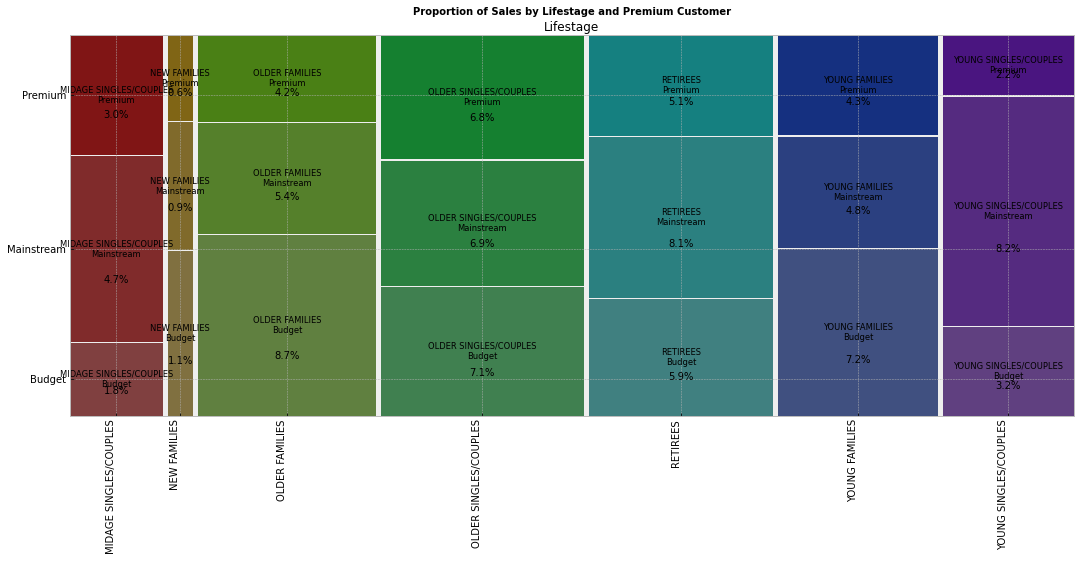

In [35]:
# Grouping and aggregating the data
stage_premium = final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(Sales_By_Stage_and_Premium=('TOT_SALES',"sum")).reset_index()
# Creating a dictionary for the mosaic plot
stage_premium_dict = stage_premium.set_index(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['Sales_By_Stage_and_Premium'].to_dict()
stage_premium_dict

# Plotting the mosaic plot
fig, ax = plt.subplots(figsize=(18,7))
mosaic(stage_premium_dict, ax=ax, title='Proportion of Sales by Lifestage and Premium Customer')

# Adding labels and title
plt.xlabel('Lifestage')
plt.ylabel('Premium Customer')

# Adding labels with proportion of sales
total_sales = sum(stage_premium_dict.values())
for (key, value) in stage_premium_dict.items():
    proportion = value / total_sales * 100
    # Extracting the coordinates for the text
    rect = ax.patches[list(stage_premium_dict.keys()).index(key)]
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() / 3
    ax.text(x, y, f'{proportion:.1f}%', ha='center', va='center', color='black')
    
# Tilting the x-axis labels by 90 degrees
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

# Show plot
plt.show()

From the chart, we can see that the sales are coming mostly from OLDER FAMILIES in BUDGET, RETIREES in MAINSTREAM and YOUNG SINGLES/COUPLES in MAINSTREAM

In [36]:
final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(N=("LYLTY_CARD_NBR","nunique")).sort_values(by="N", ascending = False).reset_index()

,LIFESTAGE,PREMIUM_CUSTOMER,N
0,YOUNG SINGLES/COUPLES,Mainstream,8088
1,RETIREES,Mainstream,6479
2,OLDER SINGLES/COUPLES,Mainstream,4930
3,OLDER SINGLES/COUPLES,Budget,4929
4,OLDER SINGLES/COUPLES,Premium,4750
5,OLDER FAMILIES,Budget,4675
6,RETIREES,Budget,4454
7,YOUNG FAMILIES,Budget,4017
8,RETIREES,Premium,3872
9,YOUNG SINGLES/COUPLES,Budget,3779


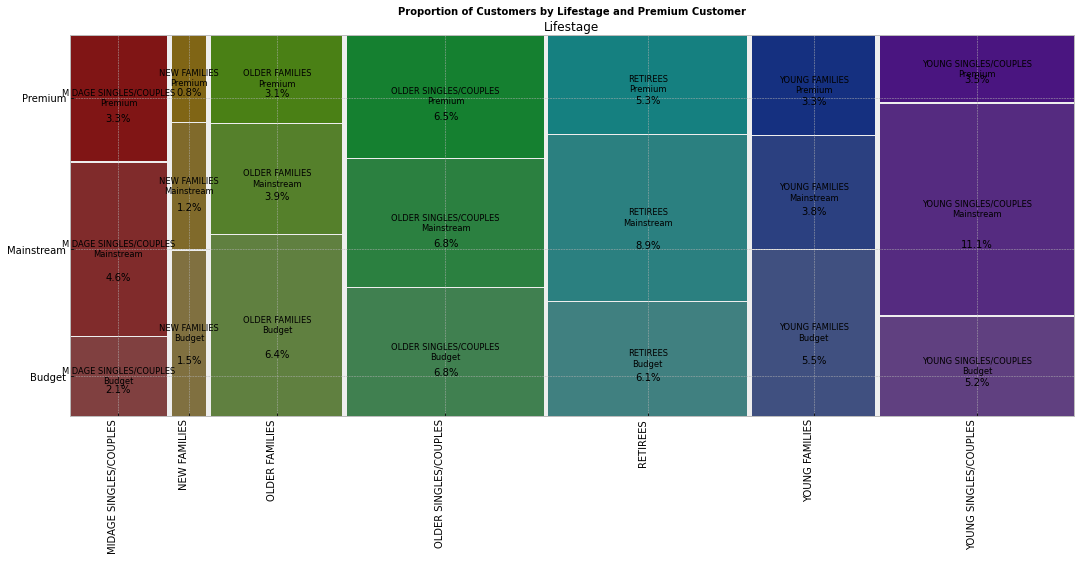

In [37]:
# Grouping and aggregating the data
customer_count = final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(N=("LYLTY_CARD_NBR","nunique")).reset_index()
# Creating a dictionary for the mosaic plot
customer_count_dict = customer_count.set_index(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['N'].to_dict()

# Plotting the mosaic plot
fig, ax = plt.subplots(figsize=(18,7))
mosaic(customer_count_dict, ax=ax, title='Proportion of Customers by Lifestage and Premium Customer')

# Adding labels and title
plt.xlabel('Lifestage')
plt.ylabel('Premium Customer')

# Adding labels with proportion of sales
total_sales = sum(customer_count_dict.values())
for (key, value) in customer_count_dict.items():
    proportion = value / total_sales * 100
    # Extracting the coordinates for the text
    rect = ax.patches[list(customer_count_dict.keys()).index(key)]
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() / 3
    ax.text(x, y, f'{proportion:.1f}%', ha='center', va='center', color='black')
    
# Tilting the x-axis labels by 90 degrees
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

# Show plot
plt.show()

The YOUNG SINGLES/COUPLES in MAINSTREAM and RETIREES in MAINSTREAM are a very large demographic compared to the others which will skew the sales. But OLDER FAMILIES in BUDGET are having more sales than their proportional customer count. Let's see how the number of chips packets sold per customer impacts the total sales numbers.

In [40]:
avg_sales = final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum()/x['LYLTY_CARD_NBR'].nunique()).reset_index(name = "AVG")

avg_sales.sort_values(by = "AVG", ascending = False, inplace=True)

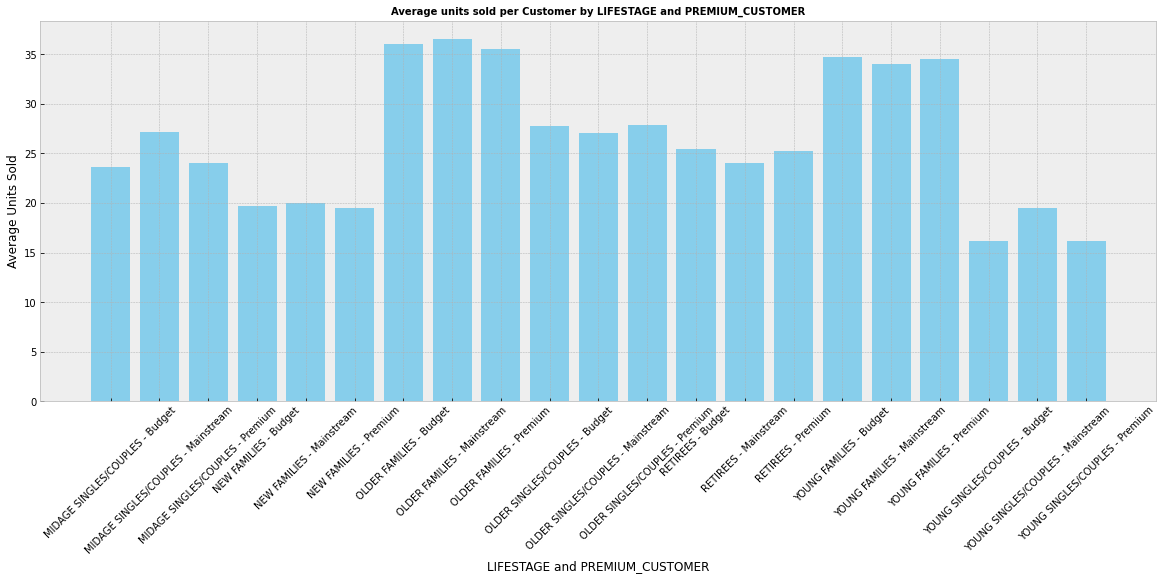

In [64]:
plt.figure(figsize = (20,7))
plt.bar(avg_sales.index, avg_sales['AVG'], color = "skyblue")
plt.xlabel("LIFESTAGE and PREMIUM_CUSTOMER")
plt.ylabel("Average Units Sold")
plt.title("Average units sold per Customer by LIFESTAGE and PREMIUM_CUSTOMER")
plt.xticks(avg_sales.index, avg_sales[['LIFESTAGE', 'PREMIUM_CUSTOMER']].apply(lambda x: f"{x[0]} - {x[1]}", axis=1), rotation=45)
plt.show()

Units sold per customer is more for NEW FAMILIES - PREMIUM, OLDER FAMILIES - BUDGET, OLDER FAMILIES - MAINSTREAM, RETIREES - PREMIUM, YOUNG FAMILIES - MAINSTREAM and YOUNG FAMILIES - MAINSTREAM. It seems that generally, average units sold is more for OLDER FAMILIES and YOUNG FAMILIES. Now let's check the average price per unit sold for each segment.

In [70]:
avg_price_per_unit = final_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum()/x['PROD_QTY'].sum()).reset_index(name = "AVG_PRICE")

avg_price_per_unit.sort_values(by = "AVG_PRICE", ascending = False, inplace=True)

In [71]:
avg_price_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,4.080079
1,MIDAGE SINGLES/COUPLES,Mainstream,4.000346
4,NEW FAMILIES,Mainstream,3.939315
3,NEW FAMILIES,Budget,3.936178
12,RETIREES,Budget,3.933660
14,RETIREES,Premium,3.924050
11,OLDER SINGLES/COUPLES,Premium,3.891748
5,NEW FAMILIES,Premium,3.886067
9,OLDER SINGLES/COUPLES,Budget,3.883299
13,RETIREES,Mainstream,3.842170


Creating a bar chart for this as well

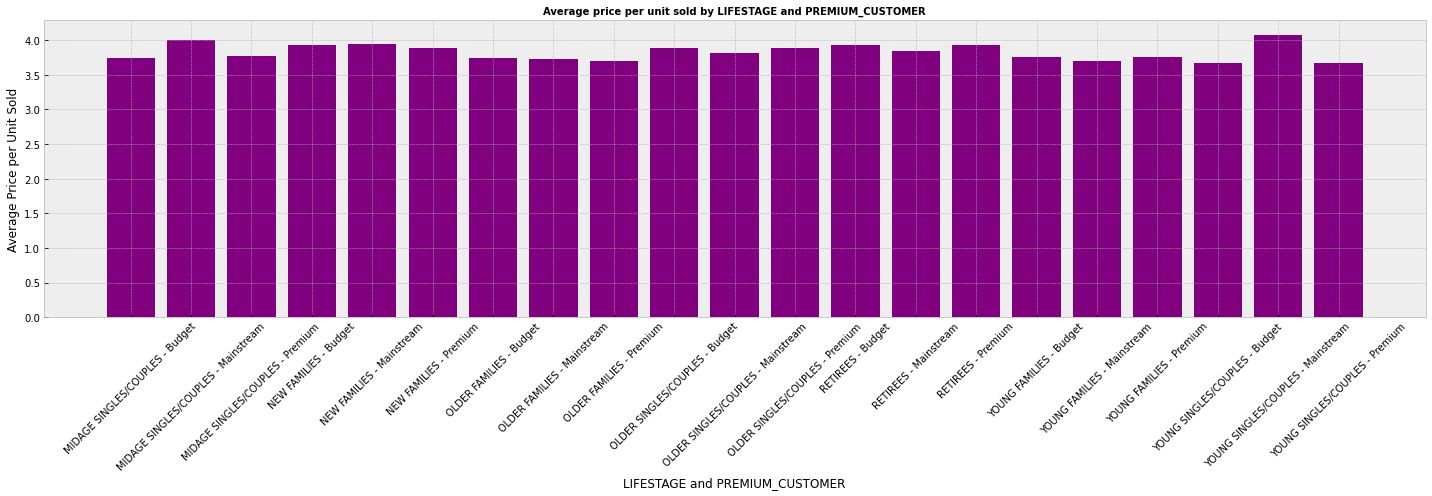

In [75]:
plt.figure(figsize = (20,7))
plt.bar(avg_price_per_unit.index, avg_price_per_unit['AVG_PRICE'], color = "purple")
plt.xlabel('LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('Average Price per Unit Sold')
plt.title('Average price per unit sold by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(avg_price_per_unit.index, avg_price_per_unit[['LIFESTAGE','PREMIUM_CUSTOMER']].apply(lambda x: f"{x[0]} - {x[1]}", axis = 1), rotation = 45)
plt.tight_layout()
plt.show()

From this visualization, the initial observation is that there are no outliers and the price per unit is the same across all the LIFESTAGE - PREMIUM_CUSTOMER segments. But, the MIDAGE SINGLES/COUPLES - MAINSTREAM and YOUNG SINGLES/COUPLES - MAINSTREAM pay more per unit compared to their budget and premium counterparts. Lets conduct a t-test to compare price per unit for mainstream customers vs others

In [79]:
# Calculate price per unit
final_data['price'] = final_data['TOT_SALES'] / final_data['PROD_QTY']

# Filter data for the two groups
mainstream_group = final_data[(final_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (final_data['PREMIUM_CUSTOMER'] == 'Mainstream')]['price']
other_group = final_data[(final_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (final_data['PREMIUM_CUSTOMER'] != 'Mainstream')]['price']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(mainstream_group, other_group, alternative='greater')

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium, young and mid-age singles and couples.")
else:
    print("There is no significant difference in the unit price between mainstream and budget or premium, young and mid-age singles and couples.")

t-statistic: 40.83413678791155
p-value: 0.0
The unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium, young and mid-age singles and couples.


We can deep-dive into specific customer segments. Let's check for YOUNG SINGLES/COUPLES - MAINSTREAM vs Others

In [106]:
segment_1 = final_data[(final_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (final_data['PREMIUM_CUSTOMER'] == "Mainstream")]
others = final_data[~((final_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (final_data['PREMIUM_CUSTOMER'] == "Mainstream"))]

Let's compare brand affinity between these two segments

In [108]:
tot_qty_segment1 = segment_1['PROD_QTY'].sum()
tot_qty_others = others['PROD_QTY'].sum()

In [109]:
quantity_by_brand_seg1 = segment_1.groupby('BRAND').agg(target_segment = ('PROD_QTY', lambda x: x.sum()/tot_qty_segment1)).reset_index()
quantity_by_brand_others = others.groupby('BRAND').agg(other = ('PROD_QTY', lambda x: x.sum()/tot_qty_others)).reset_index()

In [110]:
#merging both dataframes to calculate affinity to brand for the target segment
brand_affinity = pd.merge(quantity_by_brand_seg1, quantity_by_brand_others, on = 'BRAND')

brand_affinity['brandaffinity'] = brand_affinity['target_segment']/brand_affinity['other']

brand_affinity.sort_values(by = "brandaffinity", ascending = False)

,BRAND,target_segment,other,brandaffinity
19,TYRRELLS,0.029587,0.023933,1.236230
18,TWISTIES,0.043306,0.035283,1.227396
9,KETTLE,0.185649,0.154217,1.203818
17,TOSTITOS,0.042581,0.035377,1.203633
11,OLD,0.041598,0.034753,1.196953
12,PRINGLES,0.111980,0.093744,1.194531
5,DORITOS,0.122877,0.105278,1.167171
4,COBS,0.041856,0.036375,1.150696
8,INFUZIONS,0.060649,0.053157,1.140942
16,THINS,0.056611,0.053084,1.066440


Here, we can see that YOUNG SINGLES/COUPLES - Mainstream are 24% more likely to buy TYRRELLS brand chips and 55% less likely to buy BURGER brand chips compared to the rest of the population.

Now let's see if there is any preference between our target segment and the size of the packs that they buy

In [113]:
quantity_by_packsize_seg1 = segment_1.groupby('PACK_SIZE').agg(target_segment = ('PROD_QTY', lambda x: x.sum()/tot_qty_segment1))
quantity_by_packsize_others = others.groupby('PACK_SIZE').agg(other = ('PROD_QTY', lambda x: x.sum()/tot_qty_others))

In [115]:
pack_affinity = pd.merge(quantity_by_packsize_seg1,quantity_by_packsize_others, on = 'PACK_SIZE')

pack_affinity['packsize_affinity'] = pack_affinity['target_segment']/pack_affinity['other']

pack_affinity.sort_values(by = 'packsize_affinity', ascending = False)

,target_segment,other,packsize_affinity
PACK_SIZE,,,
270.0,0.029846,0.023377,1.276688
380.0,0.030156,0.023832,1.265356
330.0,0.057465,0.046727,1.229809
134.0,0.111980,0.093744,1.194531
110.0,0.099658,0.083643,1.191477
210.0,0.027309,0.023401,1.166997
135.0,0.013849,0.012180,1.136992
250.0,0.013460,0.011905,1.130606
170.0,0.075740,0.075440,1.003976


The target segment is 28% more likely to buy a packet of size 270g and 55% less likely to buy a packet size of 220g compared to others

Now let's see which brands sell packets of size 270g

In [120]:
final_data[final_data['PACK_SIZE'] == 270]['BRAND'].unique()

array(['TWISTIES'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement.